### Assignment 2 - College recruitment prediction 

Student Name: Sudip Shrestha \
Student ID: C0934400

Importing all the necessary libraries in one place

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

### 1. Dataset Selection

Data is from Kaggle (https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement)

Loading the data into Dataframe

In [2]:
data_df = pd.read_csv('placement_data.csv')

Checking if the data is loaded properly or not

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
#Reading first few rows of the dataset
data_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### 2. Data Preprocessing

Exploratory data analysis (EDA)

In [5]:
#Summary statistics like mean, midean, std of the dataset
print("Summary Statistics:\n", data_df.describe(include='all'))

Summary Statistics:
              sl_no gender       ssc_p    ssc_b       hsc_p   hsc_b     hsc_s  \
count   215.000000    215  215.000000      215  215.000000     215       215   
unique         NaN      2         NaN        2         NaN       2         3   
top            NaN      M         NaN  Central         NaN  Others  Commerce   
freq           NaN    139         NaN      116         NaN     131       113   
mean    108.000000    NaN   67.303395      NaN   66.333163     NaN       NaN   
std      62.209324    NaN   10.827205      NaN   10.897509     NaN       NaN   
min       1.000000    NaN   40.890000      NaN   37.000000     NaN       NaN   
25%      54.500000    NaN   60.600000      NaN   60.900000     NaN       NaN   
50%     108.000000    NaN   67.000000      NaN   65.000000     NaN       NaN   
75%     161.500000    NaN   75.700000      NaN   73.000000     NaN       NaN   
max     215.000000    NaN   89.400000      NaN   97.700000     NaN       NaN   

          degree_p

In [6]:
#Checking for missing values in the dataset
print("\nMissing Values:\n", data_df.isnull().sum())


Missing Values:
 sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


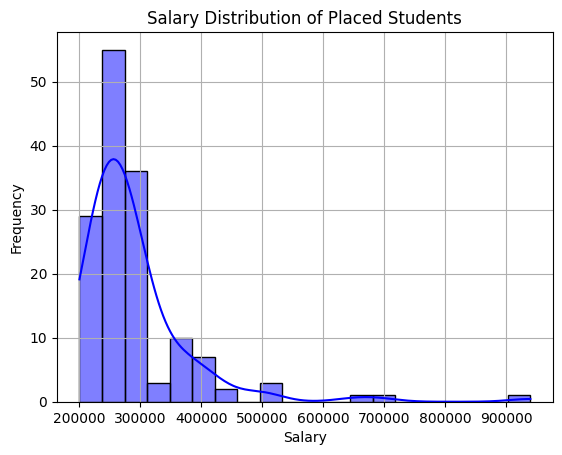

In [7]:
#Salary Distribution for placed students
plt.figure()
sns.histplot(data_df[data_df['status'] == 'Placed']['salary'], bins=20, kde=True, color='blue')
plt.title('Salary Distribution of Placed Students')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

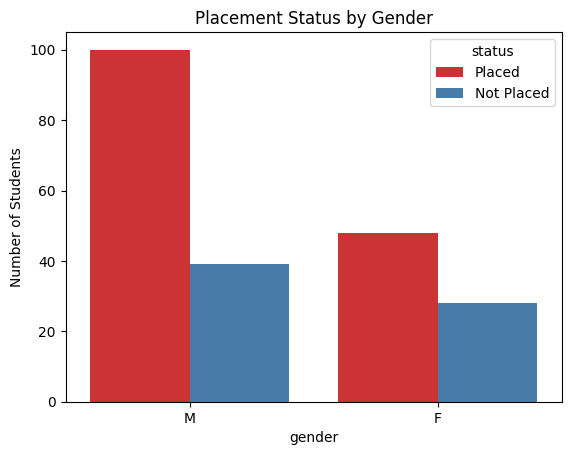

In [8]:
#Count plot of Placement Status of the students based on their gender
plt.figure()
sns.countplot(x='gender', hue='status', data=data_df, palette='Set1')
plt.title('Placement Status by Gender')
plt.ylabel('Number of Students')
plt.show()

C:\Users\sudee\AppData\Local\Temp\ipykernel_8752\2575565900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y='mba_p', data=data_df, palette='Set3')


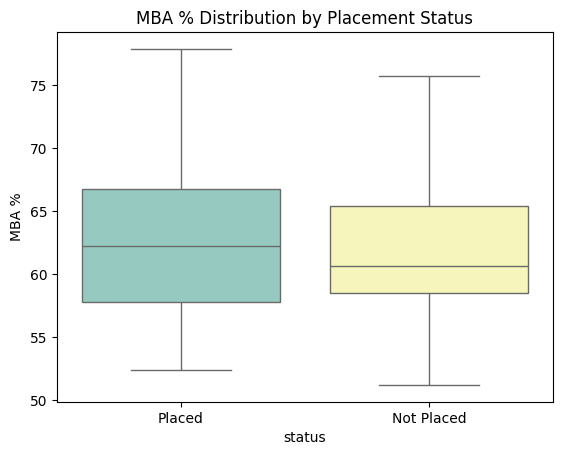

In [9]:
#Box plot of MBA percentage distribution by placement status of students
plt.figure()
sns.boxplot(x='status', y='mba_p', data=data_df, palette='Set3')
plt.title('MBA % Distribution by Placement Status')
plt.ylabel('MBA %')
plt.show()

C:\Users\sudee\AppData\Local\Temp\ipykernel_8752\3771669779.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\sudee\AppData\Local\Temp\ipykernel_8752\3771669779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


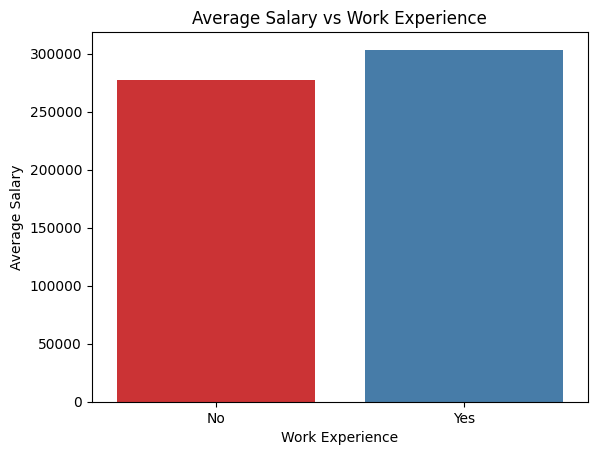

In [10]:
#Average Salary vs Work Experience for placed students
plt.figure()
sns.barplot(
    x='workex',
    y='salary',
    data=data_df[data_df['status'] == 'Placed'],
    estimator=np.mean,
    ci=None,
    palette='Set1'
)
plt.title('Average Salary vs Work Experience')
plt.ylabel('Average Salary')
plt.xlabel('Work Experience')
plt.show()

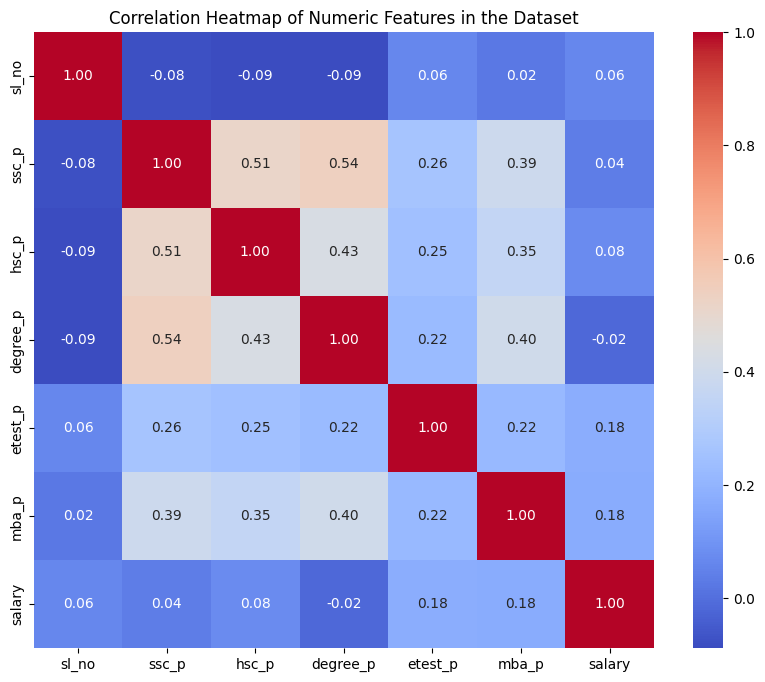

In [11]:
#Correlation Heatmap of Numeric Features from the dataset
plt.figure(figsize=(10, 8))
sns.heatmap(data_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features in the Dataset')
plt.show()

Handling Missing Values

Since there is only one column with missing values which is Salary for non placed students. We can replace the NaN with 0.

In [12]:
#Countin the missing values in salary column where theiry status is 'Not Placed'
missing_salary = data_df[data_df['salary'].isnull()]
print(missing_salary['status'].value_counts())

status
Not Placed    67
Name: count, dtype: int64


In [13]:
#Filling the missing salary with 0 for 'Not Placed' students
data_df['salary'] = data_df.apply(
    lambda row: 0 if pd.isnull(row['salary']) and row['status'] == 'Not Placed' else row['salary'],
    axis=1
)

In [14]:
#Checking if the missing values in salary column are filled
data_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Identifying and encoding categorical features and traget variables 

In [15]:
#Identifying categorical features in the dataset	
categorical_features = data_df.select_dtypes(include='object').columns.tolist()
print("Categorical Features:", categorical_features)


Categorical Features: ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


Encoding Categorical features

In [16]:
#List of features to encode
features_to_encode = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

#One-hot encoding the features and joining to original DataFrame
df_encoded = pd.get_dummies(data_df, columns=features_to_encode, drop_first=True)


Encoding Target variable

In [17]:
#Encode 'status' as 1 = Placed, 0 = Not Placed
data_df['status_encoded'] = data_df['status'].map({'Placed': 1, 'Not Placed': 0})


In [18]:
#Checking if the encoding is done correctly
data_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,status_encoded
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1


In [19]:
#Drop original target column for fully numberic DataFrame
final_df = df_encoded.drop(columns=['status'])

#Checking final shape
print("Final Encoded Shape:", final_df.shape)


Final Encoded Shape: (215, 16)


Spliting data into train and test

In [20]:
#Prepare feature  (X) and target  (y)
#Excluding 'salary' as we are predicting placement and salary is also indicator for placement
X = final_df.drop(columns=['salary'])  
y = data_df['status_encoded']

#Train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    #preserving class ratio in both sets
    stratify=y  
)

#Printing out basic stat of split to check
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Training target distribution:\n", y_train.value_counts(normalize=True))
print("Test target distribution:\n", y_test.value_counts(normalize=True))

Training set size: (150, 15)
Test set size: (65, 15)
Training target distribution:
 status_encoded
1    0.686667
0    0.313333
Name: proportion, dtype: float64
Test target distribution:
 status_encoded
1    0.692308
0    0.307692
Name: proportion, dtype: float64


### 3 & 4. Model Selection & Model Training

1. Logistic Regression
Reason: Baseline model for binary classification and easy to interpret and fast

In [21]:
#Creating pipelines to scale the data first and applying logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000))
])

#Hyperparameter tuning for Logistic Regression using GridSearchCV
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10]
}

#Performing grid search with cross-validation
lr_grid = GridSearchCV(pipeline, param_grid, cv=5)

#Fitting the model to the training data
lr_grid.fit(X_train, y_train)

#Printing the best parameters found by GridSearchCV
print("Best Logistic Regression Params:", lr_grid.best_params_)


Best Logistic Regression Params: {'log_reg__C': 1}


2. Random Forest Classifier \
Reason: Handles nonlinear relationships and feature interaction really well.

In [22]:
#Initializing the random forest with fixed random state for reproducibility
rf = RandomForestClassifier(random_state=42)

#Defining hyperparameters for Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
#Performing grid search with cross-validation for Random Forest
rf_grid = GridSearchCV(rf, rf_params, cv=5)

#Fitting the Random Forest model to the training data
rf_grid.fit(X_train, y_train)

#Printing the best parameters found by GridSearchCV for Random Forest
print("Best Random Forest Params:", rf_grid.best_params_)

Best Random Forest Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


3. Support Vector Machine (SVM) \
Reason: Its very effective for high-dimensional feature space


In [23]:

#Creating pipeline for SVM with scaling
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

#Defining hyperparameters for SVM
svm_params = {
    #Regularization parameter
    'svc__C': [0.1, 1, 10],
    #Trying both linear and RBF kernels
    'svc__kernel': ['linear', 'rbf']
}
#Performing grid search with cross-validation for SVM
svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5)
#Fitting the SVM model to the training data
svm_grid.fit(X_train, y_train)
#Printing the best parameters found by GridSearchCV for SVM
print("Best SVM Params:", svm_grid.best_params_)


Best SVM Params: {'svc__C': 1, 'svc__kernel': 'linear'}


### 5. Model Evaluation

In [24]:
#Creating function to evaluate and print model metrics
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation Metrics")
    print("-" * 40)
    
    #Accuracy, Precision, Recall, F1 Score, and Confusion Matrix
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    

#Evaluating and prining metrics for each model
evaluate_model("Logistic Regression", lr_grid.best_estimator_, X_test, y_test)
evaluate_model("Random Forest", rf_grid.best_estimator_, X_test, y_test)
evaluate_model("SVM", svm_grid.best_estimator_, X_test, y_test)



Logistic Regression Evaluation Metrics
----------------------------------------
Accuracy : 0.7846153846153846
Precision: 0.803921568627451
Recall   : 0.9111111111111111
F1 Score : 0.8541666666666666

Confusion Matrix:
 [[10 10]
 [ 4 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.50      0.59        20
           1       0.80      0.91      0.85        45

    accuracy                           0.78        65
   macro avg       0.76      0.71      0.72        65
weighted avg       0.78      0.78      0.77        65


Random Forest Evaluation Metrics
----------------------------------------
Accuracy : 0.8307692307692308
Precision: 0.84
Recall   : 0.9333333333333333
F1 Score : 0.8842105263157894

Confusion Matrix:
 [[12  8]
 [ 3 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.60      0.69        20
           1       0.84      0.93      0.88        45



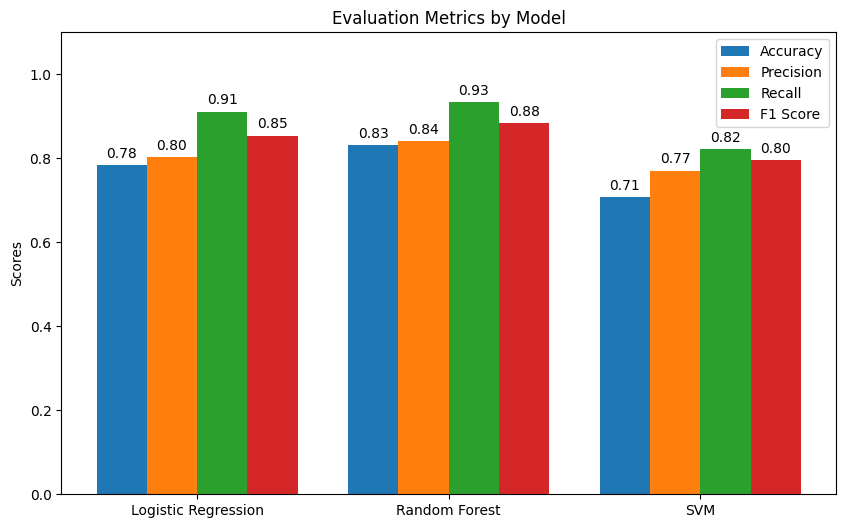

In [25]:
#Storing the best models for comparison
models = {
    "Logistic Regression": lr_grid.best_estimator_,
    "Random Forest": rf_grid.best_estimator_,
    "SVM": svm_grid.best_estimator_
}

#Initialzing result dictionary to store evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results = {name: {} for name in models.keys()}

#Evaluating each model and storing results
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name]['Accuracy'] = accuracy_score(y_test, y_pred)
    results[name]['Precision'] = precision_score(y_test, y_pred)
    results[name]['Recall'] = recall_score(y_test, y_pred)
    results[name]['F1 Score'] = f1_score(y_test, y_pred)

#Preparing data for bar chart
labels = list(results.keys())
accuracy = [results[m]['Accuracy'] for m in labels]
precision = [results[m]['Precision'] for m in labels]
recall = [results[m]['Recall'] for m in labels]
f1 = [results[m]['F1 Score'] for m in labels]

x = np.arange(len(labels))
width = 0.2
#Plotting group bar chart for model evaluation metrics
fig, ax = plt.subplots(figsize=(10, 6))

#Creating bars for each metric
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1 Score')

#Setting labels and title for the plot
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0, 1.1])

#Adding value labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

#Applying labels to all groups of bars
for rects in [rects1, rects2, rects3, rects4]:
    add_labels(rects)

plt.show()


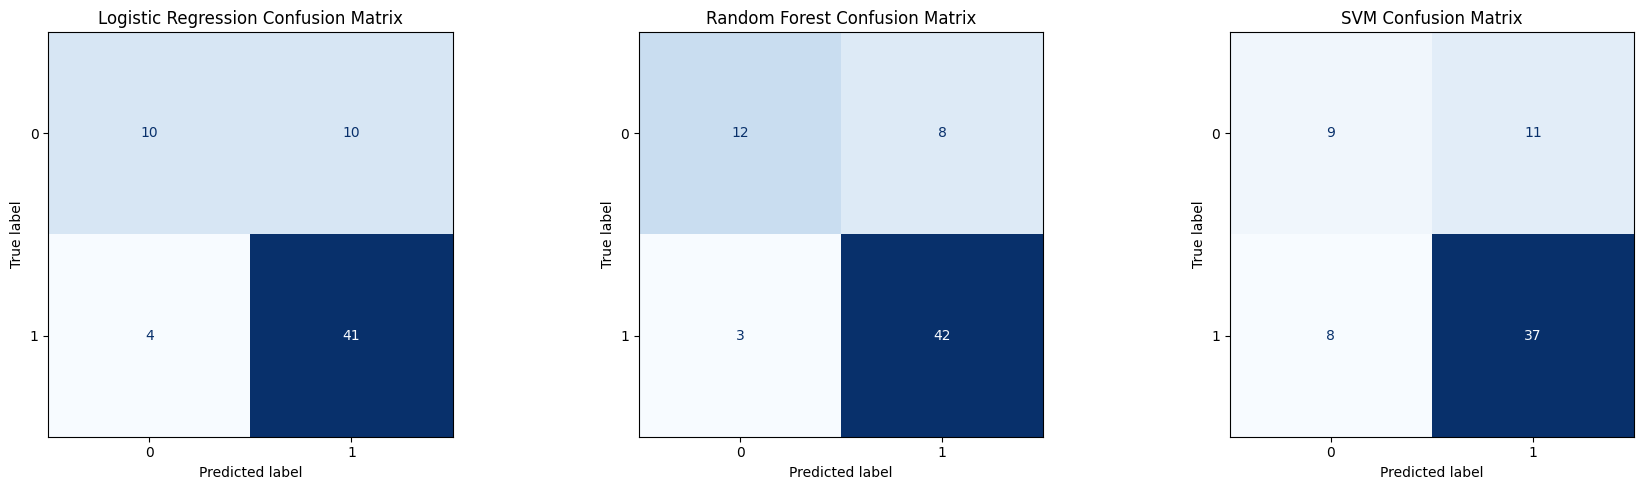

In [26]:
#Creating subplot layout for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#Going through each model and plotting confusion matrix
for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    #Calculating confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    #Creating confusion matrix display
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.set_title(f"{name} Confusion Matrix")

#For better spacing and layout
plt.tight_layout()
plt.show()


Above confusion matrices shows the performance of the Logistic Regression, Random Forest, and Support Vector Machine models. Logistic Regression performed well with high recall but produced more false positives. SVM had the lowest performance, with the most misclassifications. Random Forest outperformed both, with the highest accuracy (83.1%), precision (84%), recall (93.3%), and F1-score (88.3%), indicating a good balance of identifying positive and negative cases. As a result, Random Forest is the most effective and reliable model for this classification task.

### 6. Voting Classifier

In [27]:
#Creating an ensemble model using Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_grid.best_estimator_), #Best Logistic Regression model
        ('rf', rf_grid.best_estimator_), #Best Random Forest model
        ('svm', svm_grid.best_estimator_) #Best SVM model
    ],
    #Using hard voting to average probabilities
    voting='hard' 
)

#Fitting the voting classifier to the training data
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('log_reg',
                                               LogisticRegression(C=1,
                                                                  max_iter=1000))])),
                             ('rf',
                              RandomForestClassifier(min_samples_split=5,
                                                     random_state=42)),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svc',
                                               SVC(C=1, kernel='linear'))]))])

In [28]:
#Evaluating individual models
evaluate_model("Logistic Regression", lr_grid.best_estimator_, X_test, y_test)
evaluate_model("Random Forest", rf_grid.best_estimator_, X_test, y_test)
evaluate_model("SVM", svm_grid.best_estimator_, X_test, y_test)

#Evaluating voting classifier
evaluate_model("Voting Classifier", voting_clf, X_test, y_test)



Logistic Regression Evaluation Metrics
----------------------------------------
Accuracy : 0.7846153846153846
Precision: 0.803921568627451
Recall   : 0.9111111111111111
F1 Score : 0.8541666666666666

Confusion Matrix:
 [[10 10]
 [ 4 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.50      0.59        20
           1       0.80      0.91      0.85        45

    accuracy                           0.78        65
   macro avg       0.76      0.71      0.72        65
weighted avg       0.78      0.78      0.77        65


Random Forest Evaluation Metrics
----------------------------------------
Accuracy : 0.8307692307692308
Precision: 0.84
Recall   : 0.9333333333333333
F1 Score : 0.8842105263157894

Confusion Matrix:
 [[12  8]
 [ 3 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.60      0.69        20
           1       0.84      0.93      0.88        45

